Avem o populatie de agenti. fiecare agent are o preferinta 
asupra procentului de vecini care sa fie de acelasi tip. 
daca un agent este inconjurat de mai multi vecini de tipuri 
diferite decat poate "tolera", agentul se muta intr-o zona in 
care nu se intampla acest lucru. 

Pentru a evolua sistemul, la fiecare iteratie, alegem agenti la 
intamplare si stabilim daca acestia se muta sau nu.

1. Definim un agent
2. Definim un spatiu (mediu) unde se gasesc agentii
3. Mecanism pentru a determina cati vecini are un agent
4. Mecanism prin care sa determinam daca preferintele unui agent sunt incalcate
5. Tipurile de agenti 
6. Lista de agenti 
7. Stabilim pentru fiecare agent ce preferinta are
8. Un mecanism prin care sa determinam unde se pot muta 
9. Reguli pentru a defini preferintele?
10. Un mecanism pentru a alege la intamplare agentii in timpul fiecarei iteratii 
a.i. sa nu alegem de mai multe ori acelasi agent
11. Mecanism pentru a rula simularea pentru mai multe iteratii
12. Sa vizualizam simularea (pas cu pas sau pentru fiecare iteratie)

### ---- Pasul 1 ---- ###
Ce date trebuie sa tinem minte pentru un agent?
- id
- preferintele
- coordonate (locatie)
- tipul

Cum reprezentam in memorie un agent?

- O lista cu toate informatiile 
- Un obiect 
- Dictionar (JSON)

### --- Pasul 2 ---- ###
Definim spatiul = o lista de liste (o matrice)

### --- Pasul 3 ---- ### 
Definim o metoda sa calculam numarul de vecini (get_neighbor_coords())

In [13]:
# define agent types
agent_types = ["type1", "type2"]

# create an agent as an empty list
agent = []

# assign an id to our agent, 1
agent.append(1)

# assign a type 
agent.append(agent_types[0])

# assign coordinates 
coord = {
    "row": 10,
    "col": 20
 } # randul si coloana din spatiul 2D
agent.append(coord)

# assign preferences
preferences = {
    "type1": 0.9,
    "type2": 0.1
}
agent.append(preferences)

agent

def create_agent(agent_id, agent_type, coords, preferences):
    agent = [agent_id, agent_type, coords, preferences]
    return agent 

In [7]:
agent[2] 

[10, 20]

In [9]:
agent[2] = [20, 14]
agent

[1, 'type1', [20, 14], [0.9, 0.1]]

In [24]:
# Define environment
def create_environment(n_rows=15, n_cols=15):
    environment = []
    for i in range(n_rows):
        row = []
        for j in range(n_cols):
            row.append(-1)
        environment.append(row)
    return environment

In [25]:
environment1 = create_environment(10, 10)
environment1

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]

In [26]:
environment2 = create_environment()
environment2

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]

In [27]:
environment3 = create_environment(10)
environment3

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]

In [28]:
def get_neighbor_coords(row, col, n_rows, n_cols):
    # define matrix to specify neighbor coordinates
    coords = [
        [-1, -1],
        [0, -1],
        [1, -1],
        [-1, 0],
        [1, 0],
        [-1, 1],
        [0, 1],
        [1, 1]
    ]

    # get coordinates for every neighbor, starting with (x, y)
    neighbor_coords = []
    for coord in coords:
        neighbor = {
            "row": row + coord[0],
            "col": col + coord[1]
        }
        # eliminate invalid neighbors
        if neighbor["col"] >= 0 and neighbor["col"] < n_cols and neighbor["row"] >= 0 and neighbor["row"] < n_rows:
            neighbor_coords.append(neighbor)
    return neighbor_coords

In [29]:
x_max = 10
y_max = 15
get_neighbor_coords(5, 5, x_max, y_max)

[{'row': 4, 'col': 4},
 {'row': 5, 'col': 4},
 {'row': 6, 'col': 4},
 {'row': 4, 'col': 5},
 {'row': 6, 'col': 5},
 {'row': 4, 'col': 6},
 {'row': 5, 'col': 6},
 {'row': 6, 'col': 6}]

In [30]:
import random 

n_rows = 20
n_cols = 20
enviroment = create_environment(n_rows=n_rows, n_cols=n_cols)

n_agents = int(0.7 * n_rows * n_cols)

agents = []
for i in range(n_agents):
    location = {
        "row": random.randint(0, n_rows-1),
        "col": random.randint(0, n_cols-1)
    }
    agent_type_index = random.randint(0, 1)

    # preferences sets the maximum % of neighbors of a given type
    if agent_type_index == 0:
        preferences = {"type1": 0.25, "type2": 0.75}
    else:
        preferences = {"type1": 0.1, "type2": 0.9}

    agent = create_agent(i, agent_types[agent_type_index], location, preferences)
    enviroment[location["row"]][location["col"]] = agent_type_index
    agents.append(agent)

enviroment

[[0, 1, 0, 0, -1, 1, -1, 0, 0, 1, -1, -1, -1, 1, 0, -1, -1, -1, -1, 1],
 [-1, 1, 1, 1, -1, -1, -1, 1, 0, 0, 0, 0, -1, -1, -1, 1, -1, 1, 1, -1],
 [1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 0, -1, 1, 0, 0, 0, -1, -1],
 [0, 1, 0, -1, -1, -1, -1, -1, -1, 1, 1, 0, -1, -1, 1, -1, 0, -1, -1, 0],
 [0, 0, -1, -1, -1, 1, -1, 0, -1, -1, 1, -1, 0, 0, 1, 1, 0, 1, 1, -1],
 [-1, -1, 0, 1, -1, -1, -1, 0, -1, -1, 1, -1, 0, -1, 0, -1, -1, 0, -1, -1],
 [-1, 1, -1, 0, -1, 0, 0, 0, -1, -1, 0, 0, -1, 1, -1, -1, 1, -1, 1, 0],
 [1, 0, -1, 1, 0, -1, 0, -1, -1, -1, 0, 0, 0, 1, -1, 0, 0, -1, -1, -1],
 [1, -1, -1, -1, 1, -1, 0, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1],
 [1, 0, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 0, 1],
 [-1, 0, 0, 1, 0, -1, -1, -1, -1, 0, -1, 0, -1, -1, -1, 0, -1, 1, -1, -1],
 [1, -1, 0, -1, 1, 0, -1, 0, -1, 1, 0, 1, -1, -1, 0, 1, 1, 1, -1, -1],
 [-1, -1, 1, -1, 0, -1, -1, 0, 1, -1, -1, -1, -1, 1, 0, -1, 0, 0, -1, -1],
 [-1, 0, 0, -1, -1, 1, 0, 1, -1, -1, 0, 0, 1, -1,

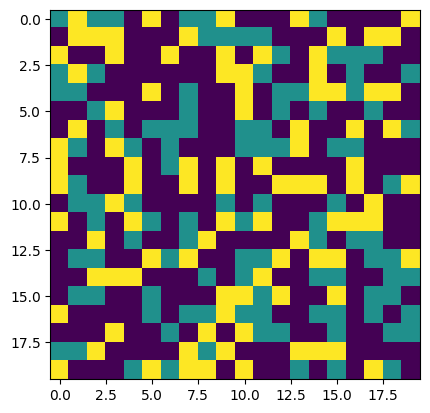

In [31]:
import matplotlib.pyplot as plt 

_ = plt.figure()
plt.imshow(enviroment)
plt.show()

In [39]:
agent = agents[0]
agent_neighbors = get_neighbor_coords(agent[2]["row"], agent[2]["col"], n_rows=n_rows, n_cols=n_cols)

neighbor_types = {
    agent_types[0]: 0,
    agent_types[1]: 0
}

# TODO: CHECK IF neighbor_types is computed correctly
for neighbor in agent_neighbors:
    # verific daca exista un agent la coord primului vecin
    if enviroment[neighbor["row"]][neighbor["col"]] != -1:
        # caut agentul care se gaseste la coord neigbor
        for current_agent in agents:
            # extrag tipul vecinului de la locatia respectiva
            if current_agent[2]["row"] == neighbor["row"] and current_agent[2]["col"] == neighbor["col"]:
                neighbor_type = current_agent[1]
                
                # cresc numarul de vecini de acelasi tip cu vecinul curent cu 1
                neighbor_types[neighbor_type] = neighbor_types[neighbor_type] + 1

type1_percentage = neighbor_types["type1"] / len(agent_neighbors)

if type1_percentage > agent[3]["type1"]:
    print("Failed to meet preferences. Agent will move.")
else:
    print("Preferences met. Agent does not move.")


Failed to meet preferences. Agent will move.


In [36]:
agent_neighbors

[{'row': 0, 'col': 1},
 {'row': 1, 'col': 1},
 {'row': 2, 'col': 1},
 {'row': 0, 'col': 2},
 {'row': 2, 'col': 2},
 {'row': 0, 'col': 3},
 {'row': 1, 'col': 3},
 {'row': 2, 'col': 3}]